# Step1: Intial exploration of the Data Set

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C://indicators.csv")

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Look like it has different indicators for different countries with the year and value of the indicator

# How many Unique countries name are there

In [8]:
#are there same no of country codes
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [9]:
#are there many indicators or few?
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

# Are there same number of country codes? 

In [14]:
#how many unique country codes are there? (should be the same #)

countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

# How many year of data we have?

In [15]:
#How many years of data do we have?
years = data['Year'].unique().tolist()
len(years)

56

# What the range of years?

In [16]:
print(min(years)," to ",max(years))

1960  to  2015


# matplotlib part 1:

# Lets pick a country and an indicator to explore: CO2 Emission per capita and the USA

In [17]:
#let pick a country and an indicator to explore:co2 emission per capita nd the usa

#select CO2 emission for the united states
hist_indicator ='CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#stage is just indicators matching the USA for country code and CO2 emission over time
stage = data[mask1 & mask2]

In [18]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


# Lets see how Emission have changed over time using matplotlib:

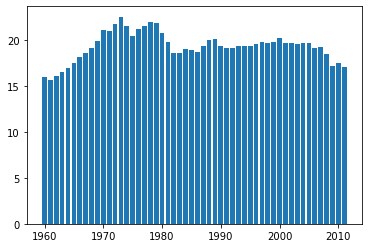

In [19]:
#get the years
years = stage['Year'].values
#get the values
co2 =stage['Value'].values

#creat
plt.bar(years,co2)
plt.show()

Turn out emission per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it

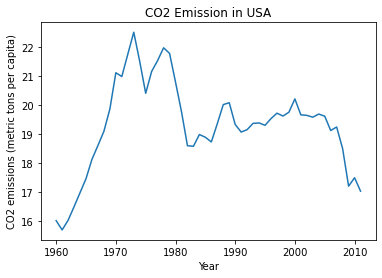

In [20]:
#switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)
#lable the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the fig
plt.title ('CO2 Emission in USA')
#to make more honest, start they y axis at 0
#plt.axis([1959, 2011, 0, 25])
plt.show()

# Using Histograms to explore the distribution of values

In [21]:
#otherwise, let's look at all the data
hist_data = stage['Value'].values


In [22]:
print(len(hist_data))

52


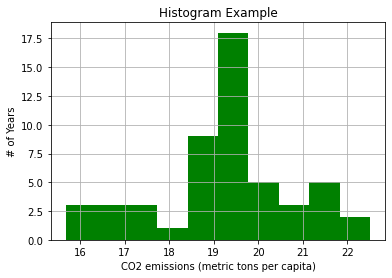

In [23]:
#the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

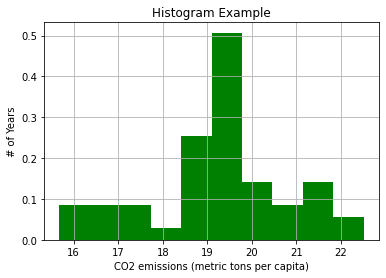

In [24]:
#the histogram of the data
plt.hist(hist_data, 10, density=True, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

So the USA has many years where it produced between 19-20 metric tons with outlier on eother side

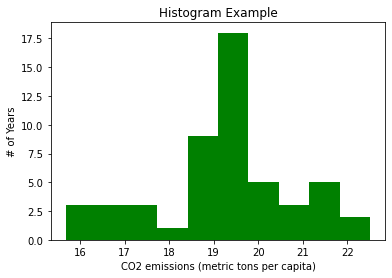

In [25]:
#the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(False)
plt.show()

# But how do the USA's number relate to those of other countries?

In [26]:
#select CO2 emission for all countries in 2011
hist_indicator ='CO2 emissions \(metric'
hist_year =2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

mask2

0          False
1          False
2          False
3          False
4          False
           ...  
5656453    False
5656454    False
5656455    False
5656456    False
5656457    False
Name: Year, Length: 5656458, dtype: bool

In [29]:
#select CO2 emission for all countries in 2011
hist_indicator ='CO2 emissions \(metric'
hist_year =2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

#apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


for hou many countries do we have CO2 per capita emission data in 2011

# Subplot:

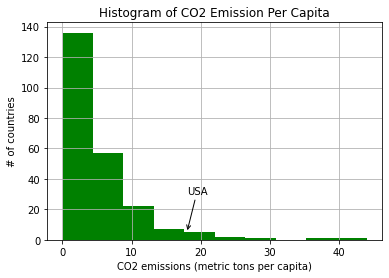

In [30]:
#let's 
#suvplots returns a touple with the fig axis attributes
fig, ax = plt.subplots()
ax.annotate("USA",
           xy=(18,5), xycoords='data',
            xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )
plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of countries')
plt.title('Histogram of CO2 Emission Per Capita')

#plt axis ([10,22,0,14])
plt.grid(True)
plt.show()

# Matplotlib Part2: Basic ploting 

Relationship between GDP and CO2 Emission in USA

In [31]:
#SELECT GDP per capita emission for the united state

hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 =data['CountryCode'].str.contains(hist_country)

#stage is just those indicators matching the usa for country code and CO2 emission over time
gdp_stage = data[mask1 & mask2]


In [32]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [33]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


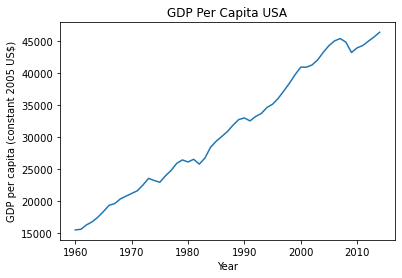

In [34]:
#switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

#label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

plt.title('GDP Per Capita USA')

#To mqake more honest, start the y axis  at 0
#plt.axix([1959,2011, 0, 25])
plt.show()

# Scatterplot for comparing GDP vs CO2 emission (per capita):

First, we'll need to make sure we're looking at the same time frames

In [35]:
print("GDP Min Year =", gdp_stage['Year'].min(), "max:", gdp_stage['Year'].max())
print("CO2 Min Year =", stage['Year'].min(), "max:", stage['Year'].max())

GDP Min Year = 1960 max: 2014
CO2 Min Year = 1960 max: 2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has eual length arrays to compare (this is actually require by scatterplot)

In [36]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


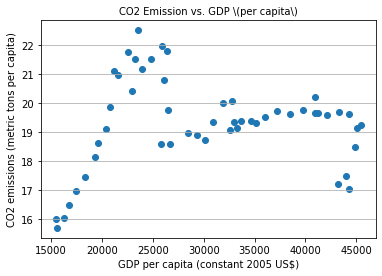

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axis = plt.subplots()

#grid lines, Xticks ,Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emission vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

x = gdp_stage_trunc['Value']
y = stage['Value']

axis.scatter(x,y )
plt.show()

This dosen't look like strong relationship, we can test this by looking at correlation

In [38]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])